In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from statsmodels.tsa.arima_model import ARIMA
import math
from pandas.plotting import lag_plot



In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [3]:
import yfinance as yf
import datetime

ticker = 'ICICIBANK.NS'
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2024, 2, 21)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,743.049988,766.000000,743.000000,764.700012,753.932556,9653095
2022-01-04,767.950012,778.000000,763.599976,772.849976,761.967834,12114437
2022-01-05,773.000000,795.849976,771.200012,788.049988,776.953796,19741360
2022-01-06,775.049988,792.500000,774.000000,785.049988,773.996033,13018067
2022-01-07,792.200012,802.299988,786.250000,793.250000,782.080566,12250210
...,...,...,...,...,...,...
2024-02-14,1009.549988,1035.699951,1007.549988,1022.700012,1022.700012,17878720
2024-02-15,1022.849976,1026.650024,1006.599976,1016.650024,1016.650024,10069878
2024-02-16,1023.200012,1026.199951,1016.900024,1023.250000,1023.250000,7159395


In [5]:
df.shape

(528, 6)

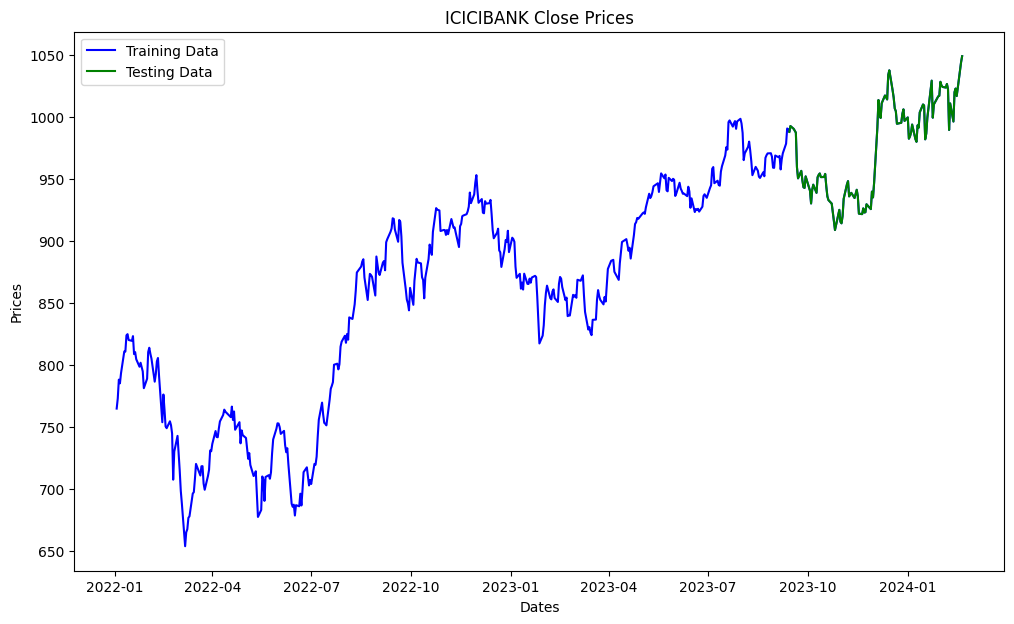

In [6]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('ICICIBANK Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [7]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
predictions = list()

# SARIMA order
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # SARIMA seasonal order (adjust the seasonal component as needed)

for t in range(len(test_ar)):
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False, method='powell', maxiter=1000)
    output = model_fit.get_forecast(steps=1)
    yhat = output.predicted_mean[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)



In [16]:
error = mean_squared_error(test_ar, predictions)
print('Mean Squared Error: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('Symmetric Mean Absolute Error: %.3f' % error2)


rmse = np.sqrt(mean_squared_error(test_ar, predictions))
mae = mean_absolute_error(test_ar, predictions)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# Calculate accuracy percentage
accuracy_percentage = 100 - error2
print("Accuracy Percentage:", accuracy_percentage)



Mean Squared Error: 134.540
Symmetric Mean Absolute Error: 0.855
Root Mean Squared Error: 11.599146931004396
Mean Absolute Error: 8.36196961294024
Accuracy Percentage: 99.14526392160077


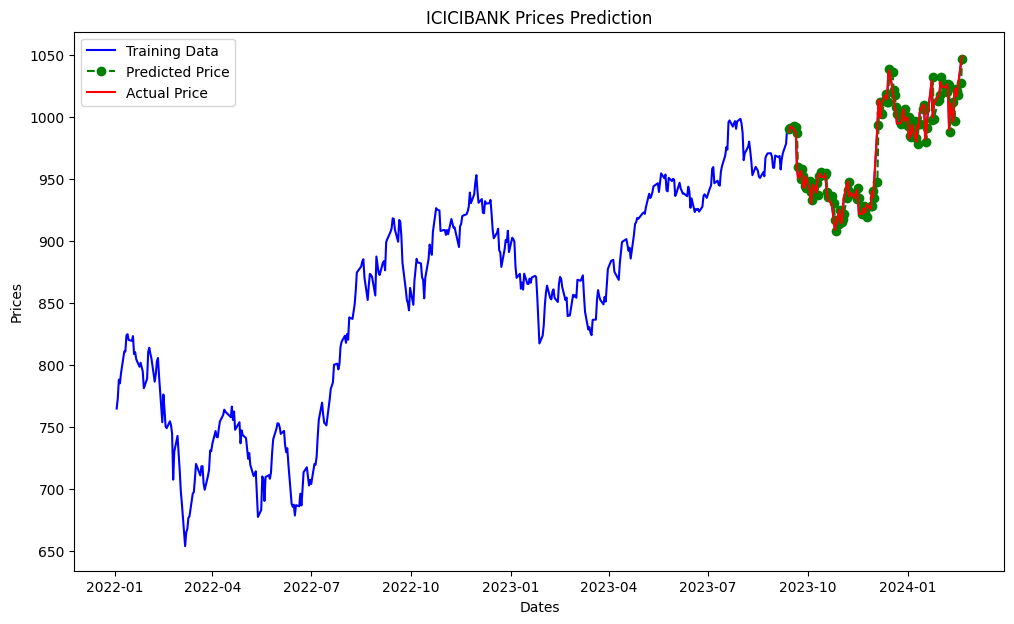

In [9]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

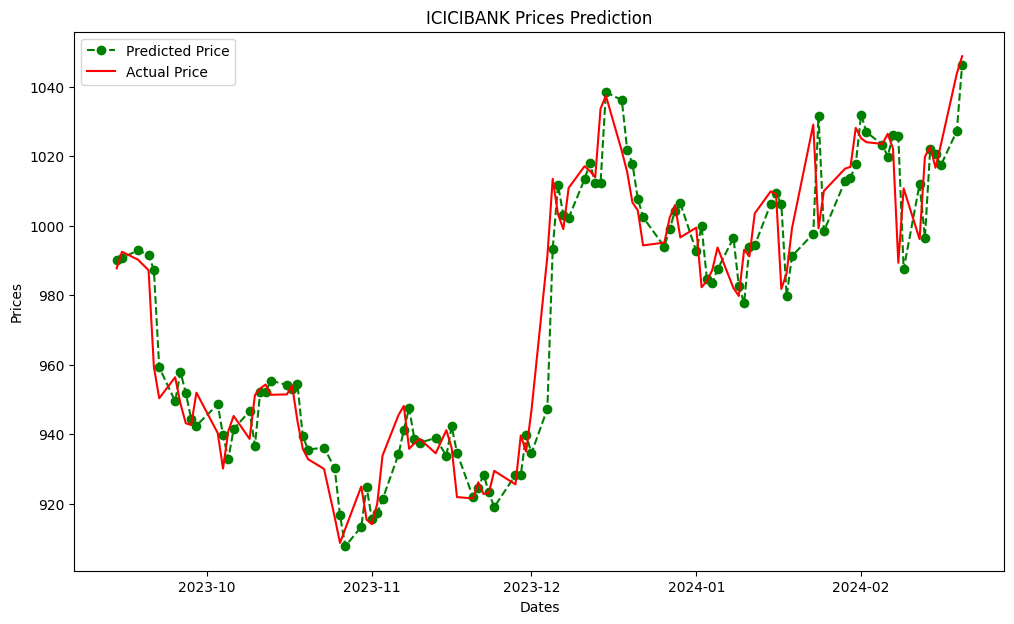

In [10]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [11]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.tail(10))

          Actual    Predicted
96   1022.150024  1026.101107
97    989.299988  1025.697213
98   1010.700012   987.379575
99    996.099976  1011.952238
100  1019.799988   996.525903
101  1022.700012  1022.173011
102  1016.650024  1020.682485
103  1023.250000  1017.365384
104  1043.750000  1027.202913
105  1048.750000  1046.272400


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [12]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# SARIMA order
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, s)

# Using the entire dataset to train the SARIMA model
model = SARIMAX(train_ar, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecasting 60 days ahead
forecast_steps = 60
forecast = model_fit.get_forecast(steps=forecast_steps)
predicted_values_60_days = forecast.predicted_mean

# Creating a date range for the next 60 days
forecast_dates = pd.date_range(start=df.index[-1], periods=61, freq='B')[1:]  # Assuming daily frequency, excluding today

# Creating a DataFrame with dates and predicted values
predicted_df_sarima = pd.DataFrame({'Date': forecast_dates, 'Predicted_Close': predicted_values_60_days})

# Save the DataFrame to a CSV file with the ticker name
csv_filename_sarima = f'pred.sarima.{ticker}.csv'
predicted_df_sarima.to_csv(csv_filename_sarima, index=False)

# Printing the DataFrame
print(predicted_df_sarima)


         Date  Predicted_Close
0  2024-02-21       990.014361
1  2024-02-22       993.082110
2  2024-02-23       993.395874
3  2024-02-26       994.976648
4  2024-02-27       995.069080
5  2024-02-28       995.903690
6  2024-02-29       994.920390
7  2024-03-01       996.208751
8  2024-03-04       999.744192
9  2024-03-05      1001.176877
10 2024-03-06      1000.960700
11 2024-03-07       997.244968
12 2024-03-08       997.484217
13 2024-03-11      1000.502155
14 2024-03-12      1000.821202
15 2024-03-13      1002.423505
16 2024-03-14      1002.513027
17 2024-03-15      1003.347685
18 2024-03-18      1002.335641
19 2024-03-19      1003.643955
20 2024-03-20      1007.183438
21 2024-03-21      1008.634430
22 2024-03-22      1008.454722
23 2024-03-25      1004.747805
24 2024-03-26      1004.986983
25 2024-03-27      1008.005066
26 2024-03-28      1008.324098
27 2024-03-29      1009.926338
28 2024-04-01      1010.015868
29 2024-04-02      1010.850527
30 2024-04-03      1009.838566
31 2024-

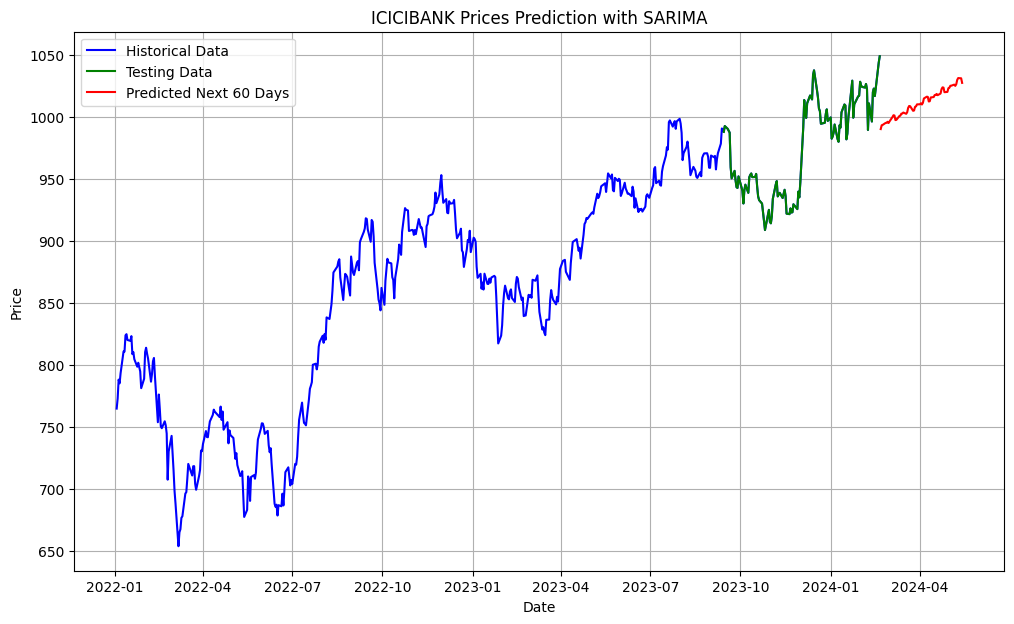

In [13]:
# Creating a DataFrame with dates and predicted values
predicted_df_sarima = pd.DataFrame({'Date': forecast_dates, 'Predicted_Close': predicted_values_60_days})

# Plotting the overall data
plt.figure(figsize=(12, 7))
plt.plot(df.index, df['Close'], label='Historical Data', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Testing Data', color='green')
plt.plot(predicted_df_sarima['Date'], predicted_df_sarima['Predicted_Close'], label='Predicted Next 60 Days', color='red')

# Adding titles and labels
plt.title('ICICIBANK Prices Prediction with SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
